In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

INTERIM_PATH = "C:/Project/UK store analysis/data/01_interim/cleaned_supermarket_data.parquet"
df = pd.read_parquet(INTERIM_PATH)

print("Cleaned data loaded successfully")
df.head()

Cleaned data loaded successfully


,supermarket,prices,prices_unit,unit,names,date,category,own_brand
0,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,2024-04-13,baby_products,False
1,Aldi,3.09,0.17,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 18 Pack/...,2024-04-13,baby_products,False
2,Aldi,3.59,0.09,unit,Mamia Ultra-fit Nappy Pants 40 Pack/Size 4,2024-04-13,baby_products,False
3,Aldi,4.79,0.32,unit,Mamia Boy's Night Pants 15 Pack,2024-04-13,baby_products,False
4,Aldi,4.79,0.32,unit,Mamia Girl's Night Pants 15 Pack,2024-04-13,baby_products,False


# Market Structure Analysis

## A. Price Distribution & Market Positioning (Premium vs. Budget)

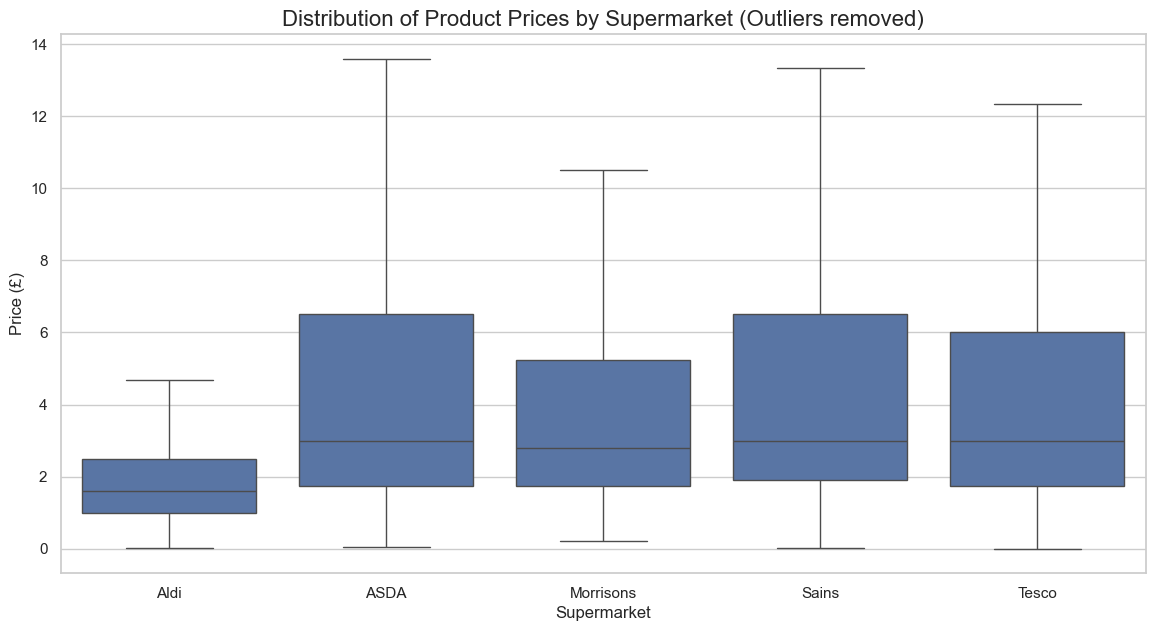

In [3]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="supermarket", y="prices", data=df, showfliers=False)     # showfliers=False to ignore outliers for a clearer view
plt.title("Distribution of Product Prices by Supermarket (Outliers removed)", fontsize=16)
plt.xlabel("Supermarket", fontsize=12)
plt.ylabel("Price (£)", fontsize=12)
plt.show()


There is a clear and dramatic difference in pricing strategy. Aldi's entire price distribution (median, quartiles) is significantly lower than its competitors. The other four supermarkets ("The Big Four") operate in a much higher price bracket.

This visually confirms the market positioning. Aldi is not just a little cheaper; it is in a fundamentally different category as a hard discounter. ASDA, Morrisons, Sains, and Tesco are competing more closely with each other on price, with Morrisons appearing slightly cheaper than the other three.


In [4]:
# Calculate and print median prices for a direct comparison
median_prices = df.groupby("supermarket")["prices"].median().sort_values()
print("Median Product Price by Supermarket:")
print(median_prices)

Median Product Price by Supermarket:
supermarket
Aldi         1.59
Morrisons    2.80
ASDA         3.00
Sains        3.00
Tesco        3.00
Name: prices, dtype: float64


## B. Product Portfolio Comparison

C:\Users\bharg\AppData\Local\Temp\ipykernel_47804\1079632890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=portfolio_size.index, y=portfolio_size.values, palette="viridis")


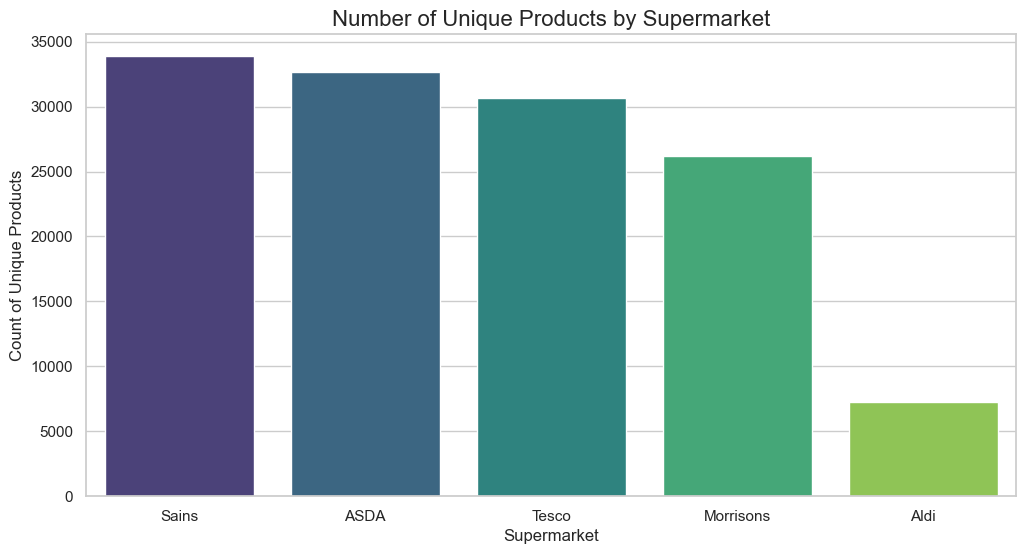


Unique Product Count by Supermarket
supermarket
Sains        33886
ASDA         32660
Tesco        30637
Morrisons    26187
Aldi          7262
Name: names, dtype: int64


In [6]:
portfolio_size = df.groupby("supermarket")["names"].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=portfolio_size.index, y=portfolio_size.values, palette="viridis")
plt.title("Number of Unique Products by Supermarket", fontsize=16)
plt.xlabel("Supermarket", fontsize=12)
plt.ylabel("Count of Unique Products", fontsize=12)
plt.show()

print("\nUnique Product Count by Supermarket")
print(portfolio_size)

Sainsbury's, ASDA, and Tesco offer a massive and comparable range of over 30,000 unique products. Morrisons has a slightly smaller but still substantial portfolio. Aldi's range is dramatically smaller, at just ~7,200 products.

This reveals the core business model difference. The Big Four are "one-stop-shops" aiming to capture all of a customer's needs through vast choice. Aldi's model is about operational efficiency: a limited, curated selection of the most popular items, which reduces warehouse complexity and cost, enabling their lower prices.


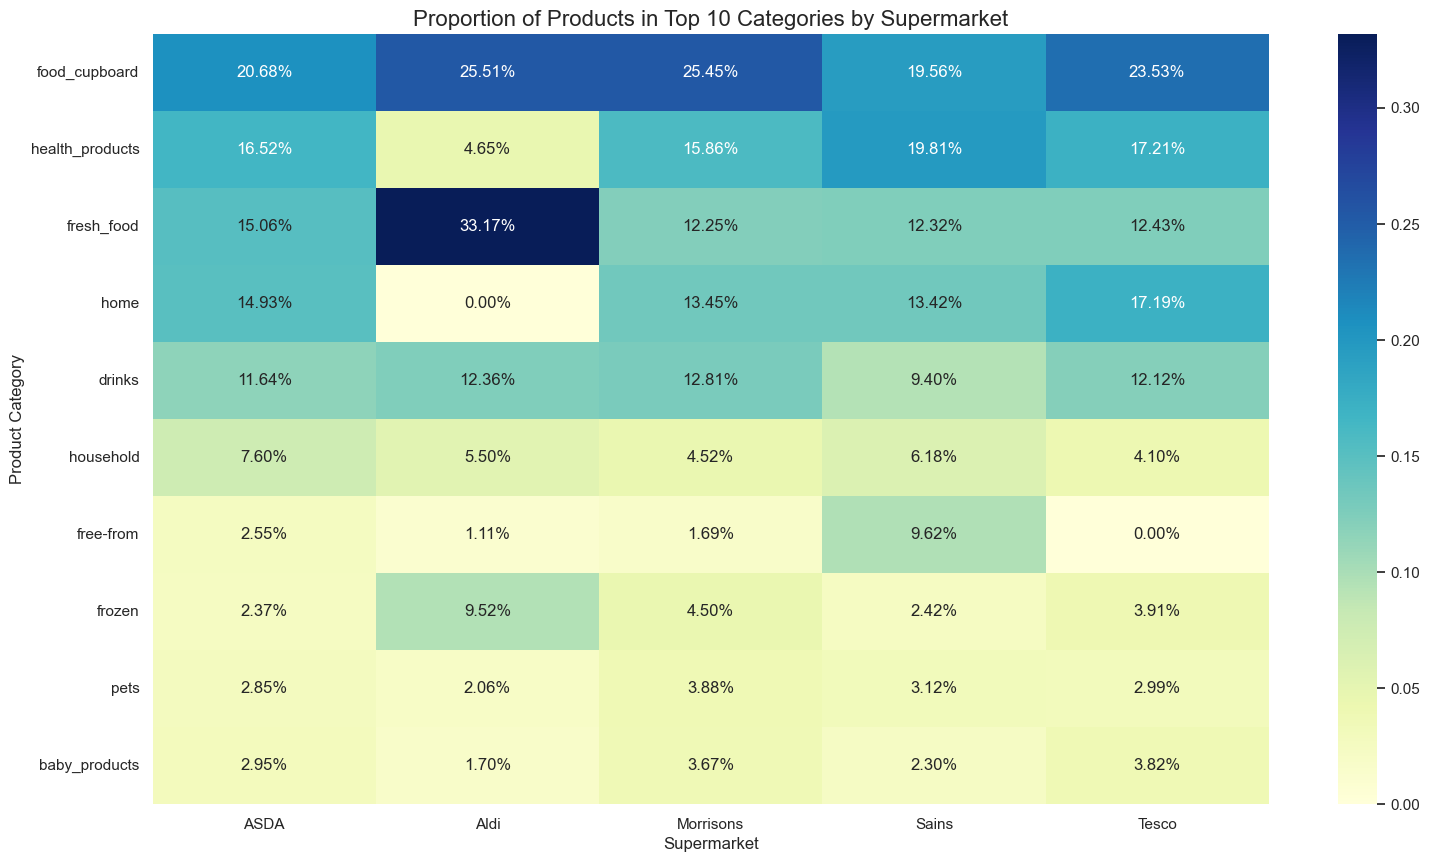

In [8]:
# Category Focus Analysis
category_distribution = df.groupby(["supermarket", "category"]).size().unstack(fill_value=0)

# Normalise to see proportions
category_proportion = category_distribution.div(category_distribution.sum(axis=1), axis=0)

plt.figure(figsize=(18, 10))
top_categories = df["category"].value_counts().nlargest(10).index
sns.heatmap(category_proportion[top_categories].T, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Proportion of Products in Top 10 Categories by Supermarket", fontsize=16)
plt.xlabel("Supermarket", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.show()

* Aldi has a massive 33.17% concentration in fresh_food, far higher than anyone else.
* Sainsbury's shows relative strength in health_products (19.81%) and free-from (9.62%).
* ASDA has a very strong showing in food_cupboard (25.51%) and home (14.93%).

This highlights strategic focus. Aldi's brand identity is heavily built on its fresh produce offerings. Sainsbury's targets a more health-conscious or dietary-specific consumer base. ASDA's focus on home and food_cupboard suggests it competes strongly on the big weekly family shop.

## C. Own Brand vs. Branded Product Analysis

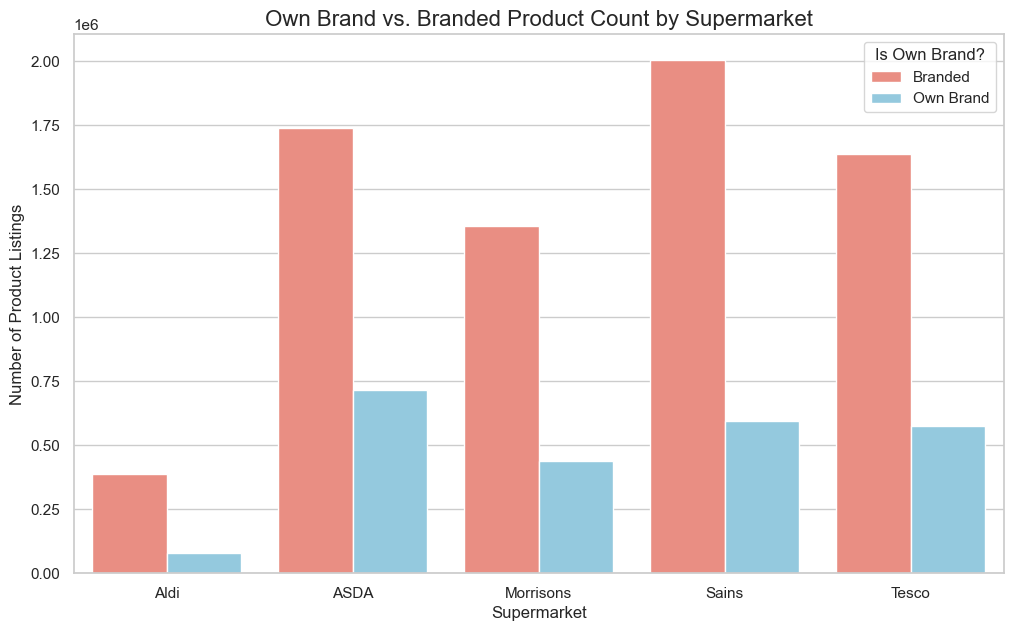


Percentage of Own Brand Products by Supermarket:
supermarket
ASDA         29.089030
Tesco        25.920408
Morrisons    24.343767
Sains        22.836000
Aldi         17.024371
Name: own_brand, dtype: float64


In [10]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x="supermarket", hue="own_brand", palette={True: "skyblue", False: "salmon"})
plt.title("Own Brand vs. Branded Product Count by Supermarket", fontsize=16)
plt.xlabel("Supermarket", fontsize=12)
plt.ylabel("Number of Product Listings", fontsize=12)
plt.legend(title="Is Own Brand?", labels=["Branded", "Own Brand"])
plt.show()

# Calculate percentage
own_brand_percentage = df.groupby("supermarket")["own_brand"].mean() * 100
print("\nPercentage of Own Brand Products by Supermarket:")
print(own_brand_percentage.sort_values(ascending=False))

The count plot can be misleading because it shows total listings, not the strategic ratio. The data shows ASDA leads in the proportion of own-brand products at ~29%, followed by the others in the 22-26% range. Intriguingly, Aldi has the lowest proportion at 17%.

This is a surprising and crucial finding that contradicts common perception. While Aldi is famous for its own brands (e.g., Mamia, Lacura), it appears that within its small, curated range, it still carries a high proportion of branded goods. Conversely, the bigger supermarkets rely heavily on their own-brand lines (e.g., Tesco's Finest, ASDA's Extra Special) to compete, making up over a quarter of their massive portfolios.

# 2. Temporal Pattern Discovery

## A. Daily Average Pattern Discovery

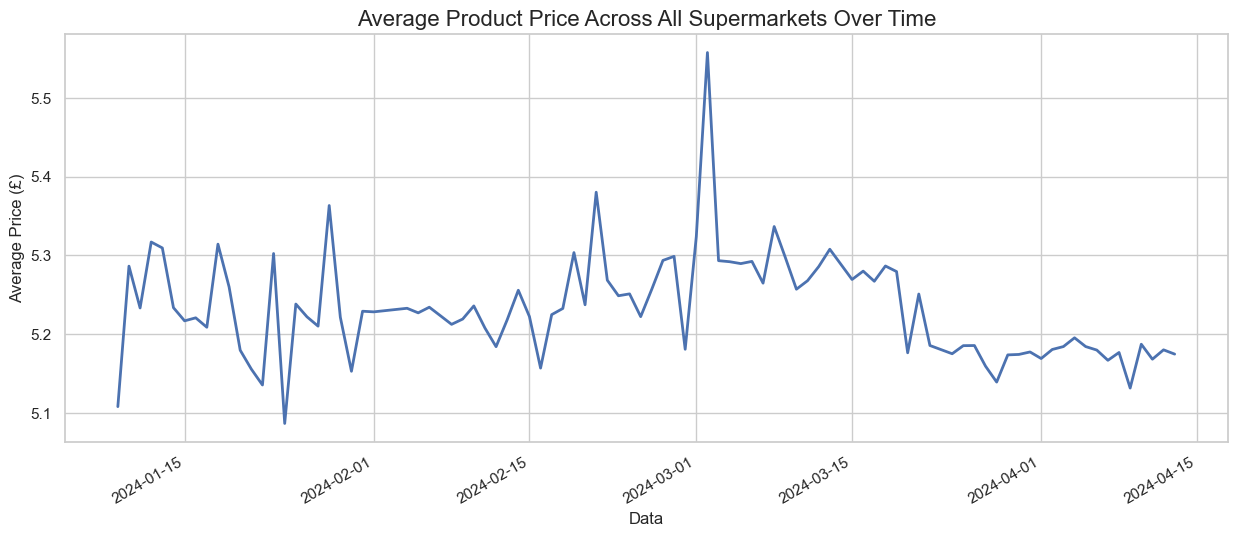

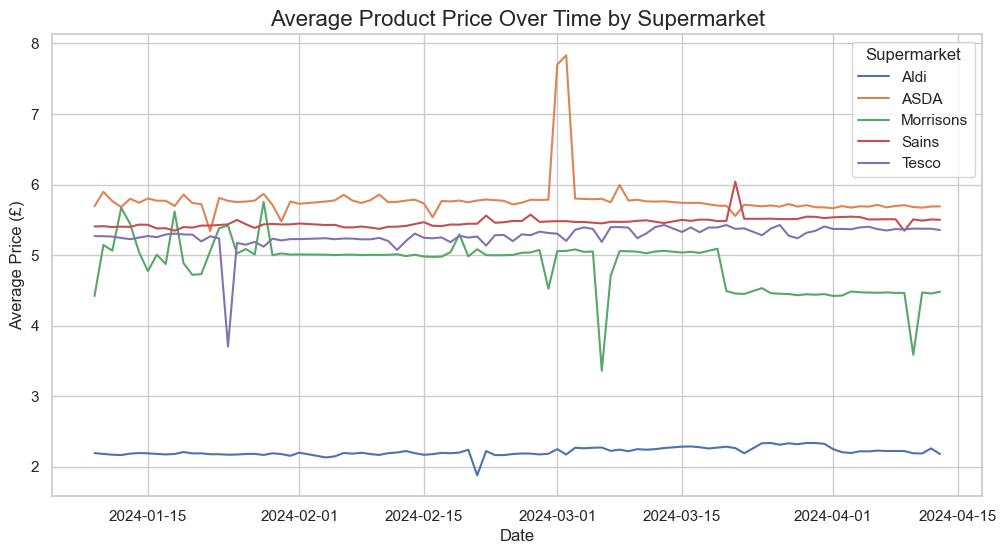

In [16]:
daily_avg_price = df.groupby("date")["prices"].mean()

plt.figure(figsize=(15, 6))
daily_avg_price.plot(linewidth=2)
plt.title("Average Product Price Across All Supermarkets Over Time", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.show()

# Price trends by Supermarket
sns.lineplot(data=df, x="date", y="prices", hue="supermarket", errorbar=None)
plt.title("Average Product Price Over Time by Supermarket", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price (£)", fontsize=12)
plt.legend(title="Supermarket")
plt.show()

The market's pricing hierarchy is remarkably stable. The lines almost never cross. Aldi is consistently the cheapest, followed by Morrisons, with Tesco, Sains, and ASDA clustered at the top. There is a dramatic price spike in early March, driven almost entirely by ASDA.

The stable hierarchy shows that these retailers have well-established price perceptions they are not trying to break. The ASDA spike is a significant "event" that warrants a deep-dive investigation. Was it a data error on a few high-value items, or a short-lived strategic price increase? This is a perfect lead-in to more advanced analysis.
